In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
X = df.drop('class',axis=1)

In [4]:
X = pd.get_dummies(X,drop_first=True)

In [5]:
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.1,random_state=101)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
param_grid = {'n_estimators':[50,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5]}

In [9]:
gb_model = GradientBoostingClassifier()

In [10]:
grid = GridSearchCV(estimator=gb_model,param_grid=param_grid)

In [11]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [12]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [13]:
predictions = grid.predict(X_test)

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      3778
           p       1.00      1.00      1.00      3534

    accuracy                           1.00      7312
   macro avg       1.00      1.00      1.00      7312
weighted avg       1.00      1.00      1.00      7312



In [15]:
feat_importances = pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=['importance'])

In [16]:
imp_feat = feat_importances[feat_importances['importance']>0.0005]

In [17]:
imp_feat.sort_values('importance')

,importance
odor_p,0.000501
population_v,0.000589
stalk-surface-above-ring_k,0.000639
cap-color_y,0.000640
population_s,0.000737
spore-print-color_u,0.000779
stalk-color-above-ring_c,0.001378
ring-number_o,0.001621
stalk-color-below-ring_w,0.002740
odor_m,0.002754


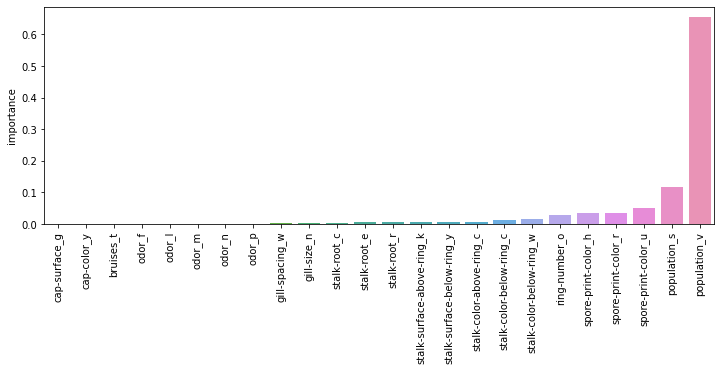

In [18]:
plt.figure(figsize=(12,4))
sns.barplot(data=imp_feat.sort_values('importance'),x=imp_feat.index,y='importance')
plt.xticks(rotation=90);